### PyTorch NN Studies Notebook II - Breast Cancer Classification (Cross Validation + Dropout)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import time
import random
from IPython.display import clear_output

In [6]:
import torch
print(torch.__version__)

1.9.1+cpu


In [3]:
import skorch
print(skorch.__version__)

0.7.0


In [4]:
from skorch import NeuralNetBinaryClassifier
from sklearn.model_selection import cross_val_score

### Loading Datasets:

In [7]:
data_base_path = 'C:/Users/Mafeus/Desktop/Curso PyTorch/Bases/Bases/'

In [8]:
input_data  = pd.read_csv(data_base_path + 'entradas_breast.csv')
output_data = pd.read_csv(data_base_path + 'saidas_breast.csv')

input_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,706.771388,19.289649,91.969033,654.889104,4.304801,4.835984,7.489124,2.366459,16.965766,0.851112,...,315.194921,25.677223,107.261213,880.583128,10.633281,25.259112,26.723742,8.745685,30.367174,1.964313
std,2430.243368,4.301036,24.298981,351.914129,21.074558,26.827478,35.618994,16.155145,53.846023,7.103493,...,1655.459336,6.146258,33.602542,569.356993,37.236433,96.473015,114.204035,39.465975,90.748044,14.464355
min,7.760000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,12.210000,16.170000,75.170000,420.300000,0.086410,0.065260,0.029580,0.020310,0.163400,0.057800,...,13.180000,21.080000,84.110000,515.300000,0.117800,0.150700,0.116800,0.064990,0.254900,0.071460
50%,13.850000,18.840000,86.240000,551.100000,0.095940,0.094620,0.063870,0.033900,0.181400,0.061660,...,15.150000,25.410000,97.660000,686.500000,0.133800,0.227900,0.249200,0.101500,0.288400,0.080060
75%,17.680000,21.800000,104.100000,782.700000,0.106100,0.132500,0.142500,0.077260,0.203600,0.066400,...,19.850000,29.720000,125.400000,1084.000000,0.150000,0.384200,0.431600,0.170800,0.331800,0.092110
max,9904.000000,39.280000,188.500000,2501.000000,123.000000,277.000000,313.000000,162.000000,304.000000,78.000000,...,9981.000000,49.540000,251.200000,4254.000000,185.000000,1058.000000,1252.000000,291.000000,544.000000,173.000000


In [9]:
output_data.describe()

,0
count,569.000000
mean,0.627417
std,0.483918
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


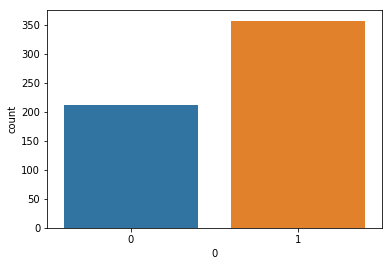

In [10]:
sns.countplot(output_data['0']);

### Data Preparation:

In [13]:
import torch.nn as nn

np.random.seed(123)
torch.manual_seed(123)

In [14]:
X = np.array(input_data, dtype=np.float32)
Y = np.array(output_data, dtype=np.float32).squeeze(1)

### NN Model Build Up

In [15]:
class torch_classifier(nn.Module):
    
    def __init__(self):
        super().__init__()

        # 30 -> 16 -> 16 -> 1
        self.dense0 = nn.Linear(30, 16)
        torch.nn.init.uniform_(self.dense0.weight)
        self.activation0 = nn.ReLU()
        self.dense1 = nn.Linear(16, 16)
        torch.nn.init.uniform_(self.dense1.weight)
        self.activation1 = nn.ReLU()
        self.dense2 = nn.Linear(16, 1)
        torch.nn.init.uniform_(self.dense2.weight)
        self.output = nn.Sigmoid()

    def forward(self, X):
        X = self.dense0(X)
        X = self.activation0(X)
        X = self.dense1(X)
        X = self.activation1(X)
        X = self.dense2(X)
        X = self.output(X)
        
        return X

In [16]:
skorch_classifier = NeuralNetBinaryClassifier(module=torch_classifier, criterion=torch.nn.BCELoss,
                                              optimizer=torch.optim.Adam, lr=0.001,
                                              optimizer__weight_decay=0.0001, max_epochs=100, 
                                              batch_size=10, train_split=False)

### Model Training:

In [17]:
results = cross_val_score(skorch_classifier, X, Y, cv = 10, scoring = 'accuracy')

C:\Users\Mafeus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\Mafeus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

C:\Users\Mafeus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
C:\Users\Mafeus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), d

  epoch    train_loss     dur
-------  ------------  ------
      1       37.1820  2.7376
      2       37.1820  0.0856
      3       37.1820  0.0878
      4       37.1820  0.0931
      5       37.1820  0.0944
      6       37.1820  0.0944
      7       37.1820  0.0983
      8       37.1820  0.0983
      9       37.1820  0.0957
     10       37.1820  0.0962
     11       37.1820  0.0996
     12       37.1820  0.0899
     13       37.1820  0.0861
     14       37.1820  0.0886
     15       37.1820  0.1206
     16       37.1820  0.0966
     17       37.1820  0.1160
     18       37.1820  0.1017
     19       37.1820  0.1007
     20       37.1820  0.1016
     21       37.1820  0.1060
     22       37.1820  0.0995
     23       37.1820  0.1023
     24       37.1820  0.0993
     25       13.6727  0.1031
     26        0.5540  0.1087
     27        0.5328  0.1120
     28        0.5156  0.1147
     29        0.4943  0.1227
     30        0.4848  0.0915
     31        0.4790  0.1171
     32   

     68        0.2540  0.1194
     69        0.2561  0.1032
     70        0.2462  0.0874
     71        0.2495  0.1025
     72        0.2406  0.1343
     73        0.2395  0.0965
     74        0.2381  0.1016
     75        0.2384  0.1192
     76        0.2341  0.0877
     77        0.2350  0.1188
     78        0.2299  0.1032
     79        0.2284  0.1008
     80        0.2224  0.1038
     81        0.2209  0.1025
     82        0.2182  0.1028
     83        0.2167  0.1032
     84        0.2114  0.1026
     85        0.2118  0.0901
     86        0.2079  0.1041
     87        0.2095  0.1042
     88        0.2069  0.0869
     89        0.2078  0.1169
     90        0.2030  0.1036
     91        0.2033  0.1043
     92        0.1995  0.1036
     93        0.1984  0.1022
     94        0.1988  0.1039
     95        0.1927  0.1037
     96        0.1987  0.1036
     97        0.1910  0.1027
     98        0.1879  0.1023
     99        0.1882  0.1043
    100        0.1836  0.1043
  epoch   

     35        0.3451  0.1087
     36        0.3408  0.0968
     37        0.3301  0.0995
     38        0.3217  0.1279
     39        0.3137  0.1289
     40        0.3026  0.0860
     41        0.2972  0.1181
     42        0.2913  0.1297
     43        0.2876  0.0927
     44        0.2823  0.1266
     45        0.2755  0.1008
     46        0.2685  0.1103
     47        0.2630  0.0912
     48        0.2573  0.1109
     49        0.2530  0.0909
     50        0.2437  0.0936
     51        0.2378  0.0934
     52        0.2276  0.1133
     53        0.2234  0.1043
     54        0.2159  0.1033
     55        0.2126  0.0890
     56        0.2068  0.1007
     57        0.2055  0.1217
     58        0.1999  0.0951
     59        0.2033  0.0954
     60        0.1994  0.0850
     61        0.1957  0.1002
     62        0.1930  0.1177
     63        0.1903  0.1148
     64        0.1919  0.1164
     65        0.1890  0.0817
     66        0.1890  0.1456
     67        0.1865  0.0858
     68   

      2       37.2320  0.1023
      3       37.2320  0.0944
      4       37.2320  0.0893
      5       37.2320  0.1056
      6       37.2320  0.0922
      7       37.2320  0.0984
      8       37.2320  0.0925
      9       37.2320  0.0934
     10       37.2320  0.0910
     11       37.2320  0.0844
     12       37.2320  0.1095
     13       37.2320  0.0982
     14       37.2320  0.0967
     15       37.2320  0.0957
     16       37.2320  0.0961
     17       37.2320  0.0954
     18       37.2320  0.0991
     19       37.2320  0.0964
     20       37.2320  0.0825
     21       37.2320  0.0874
     22       37.2320  0.0922
     23       37.2320  0.0846
     24       37.2320  0.0918
     25       37.2320  0.0835
     26       37.2320  0.1080
     27       37.2320  0.0955
     28       37.2320  0.0864
     29       37.2320  0.0849
     30       37.2320  0.0873
     31       37.2320  0.1068
     32       37.2320  0.0996
     33       37.2320  0.0938
     34       37.2320  0.0912
     35   

### Model Evaluation

In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [123]:
classifier.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [124]:
X_test_torch = torch.tensor(np.array(X_test), dtype=torch.float)
Y_test_torch = torch.tensor(np.array(Y_test), dtype=torch.float)

In [125]:
predictions = classifier.forward(X_test_torch)

print(predictions[:10][:])

tensor([[9.6507e-01],
        [1.0000e+00],
        [3.0317e-02],
        [9.9177e-01],
        [4.9362e-05],
        [7.3030e-01],
        [9.6594e-01],
        [9.9950e-01],
        [4.7877e-01],
        [7.1802e-02]], grad_fn=<SliceBackward>)


In [126]:
predictions = np.array(predictions > 0.5)

print(predictions[:10][:])

[[ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]]


In [127]:
accuracy = accuracy_score(Y_test, predictions)
print('Accuracy:', accuracy)

Accuracy: 0.8881118881118881


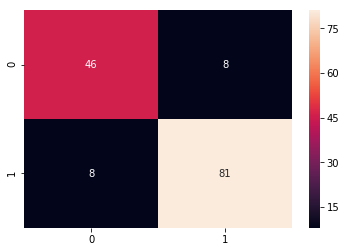

In [128]:
cm = confusion_matrix(Y_test, predictions)

sns.heatmap(cm, annot=True);